<a href="https://colab.research.google.com/github/mr-amit-yadav/Digital-Image-Processing/blob/main/DIP%20Practicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical No 1
## 1) Load and display images using OpenCV or MATLAB

In [1]:
!pip install opencv-python

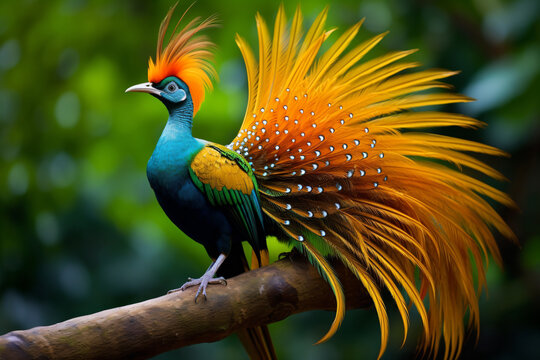

In [2]:
from PIL import Image
try:
  # Open the image file
  # Replace 'Your_image.jpg' with the actual path to your image file
  image = Image.open('Bird.jpg')
  # Display the image
  display(image)
except FileNotFoundError:
  print("Error: Image file not found.")

In [1]:
! pip install opencv-python

# Practical No 2
### 2) Apply histogram equalization on grayscale images


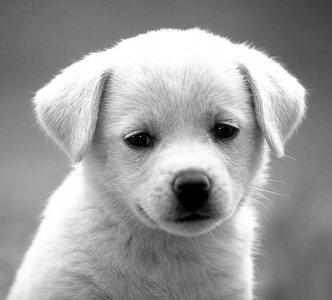

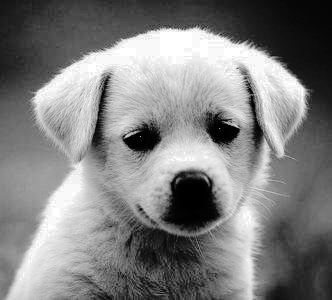

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1. Load Image(ensure it is a grayscale image or convert it)
image_path = 'Dog.jpg'
gray_image = cv2.imread(image_path,0)

if gray_image is None:
  print("Error: Unable to load the image.")
exit()

# 2.Apply Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)

# 3. Display images for Comparison
cv2_imshow(gray_image)
cv2_imshow(equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Practical No 3
## 3) Implement smoothing and sharpening filters using OpenCV
### A) Averaging Blur

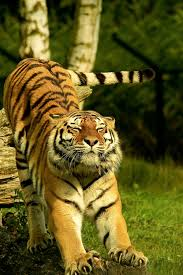

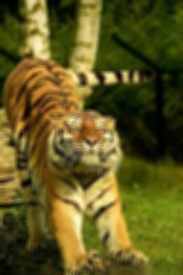

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('Tiger.jpg')

kernel_avg = np.ones((5,5),np.float32)/25
smoothed = cv2.filter2D(image,-1,kernel_avg)
cv2_imshow(image)
cv2_imshow(smoothed)

### B) Gaussian Blur

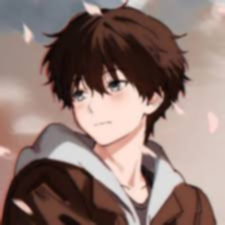

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("Anime.jpg")
smoothed_gaussian = cv2.GaussianBlur(image, (5,5), 0)

cv2_imshow(smoothed_gaussian)


### C) Median Blur

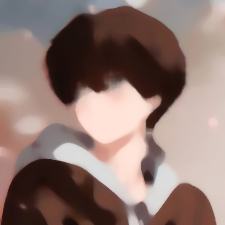

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("Anime.jpg")
smoothed_median = cv2.medianBlur(image, 15)

cv2_imshow(smoothed_median)

### D) Sharpening Filter

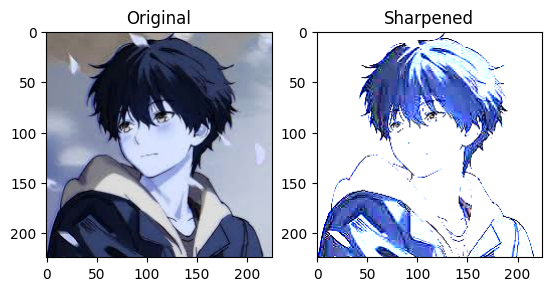

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

image =cv2.imread("Anime.jpg")
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")

kernel = np.array([[0,-1,0],[-1,9,-1],[0,-1,0]])
sharpened_image = cv2.filter2D(image,-1,kernel)
cv2.imwrite('sharpened_image.jpg', sharpened_image)

plt.subplot(1,2,2)
plt.imshow(sharpened_image)
plt.title("Sharpened")
plt.show()

# Practical No 4
## Implement image compression using OpenCV and NumPy
### Image Compression


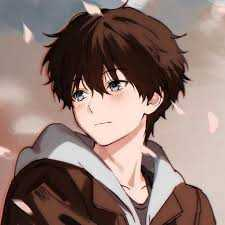

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def compress_large_jpeg(image_path, quality=90):
  # Read the Image
  image =cv2.imread(image_path)
  # Encode the image with JPEG Compression
  encode_param =[int(cv2.IMWRITE_JPEG_QUALITY),quality]
  _, encoded_image = cv2.imencode('.jpg',image,encode_param)
  # Decode the compressed image (optional, for displaying or further processing)
  decoded_image =cv2.imdecode(encoded_image,cv2.IMREAD_COLOR)
  return decoded_image

# Example usage
original_image_path = 'Anime.jpg'
compressed_image = compress_large_jpeg(original_image_path,quality=50)

# Display the compressed image using cv2_imshow
cv2_imshow(compressed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### B) Image Rotation

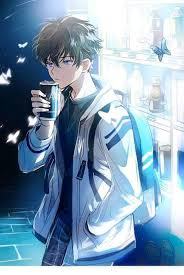

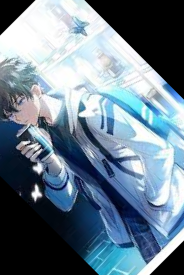

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('Boy.jpg')

# Get image dimensions
height, width = image.shape[:2]

# Define the rotaion matrix(rotate  by 45 degrees around the center)
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center,45,1.0)

# Apply the rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Display the original and rotated images
cv2_imshow(image)
cv2_imshow(rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Practical No 5
## 5) Perform edge detection using Canny and Sobel operators

### A) Canny Operators

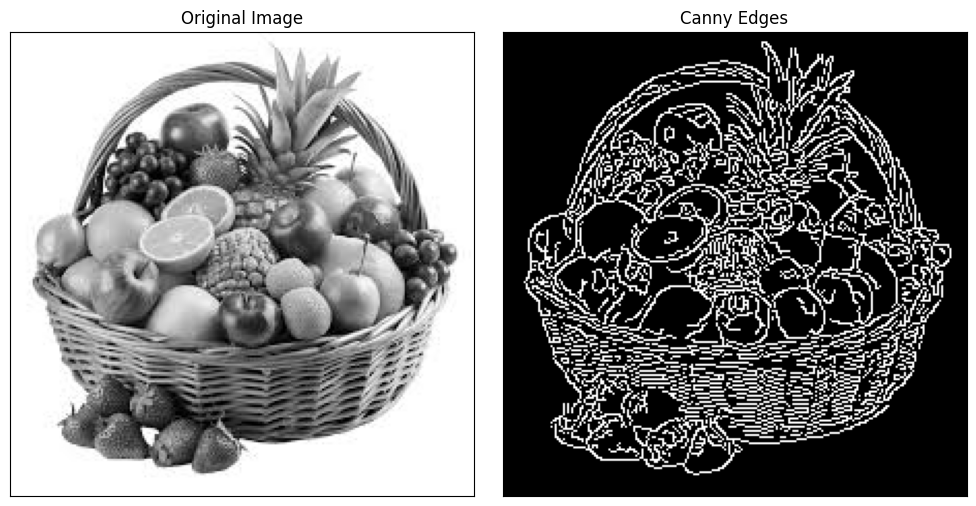

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#from google.colab.patches import cv2_imshow

# Load the image in grayscale
# Replace 'Bird.jpg' with the path to your image file
image = cv2.imread('basket.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load the image.")

else:
  edges = cv2.Canny(image, 100, 200)

# Display the original image and the edge-detected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

### B) Sobel operators

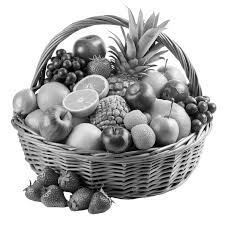

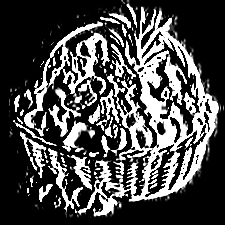

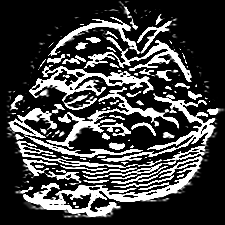

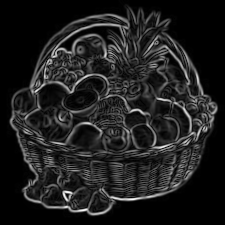

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image in grayscale
image = cv2.imread('basket.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Unable to load the image.")
else:
  # Apply sobel operator for horizontal edges (dx=1,dy=0)
  sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)

  # Apply sobel operator for vertical edges (dx=0,dy=1)
  sobel = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)

  # Calculate the magnitude of the gradient
  magnitude = np.sqrt(sobelx**2 + sobel**2)

  # Convert to 8-bit for display
  sobel_magnitude = cv2.normalize(magnitude,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)

  #Display the original image and the  sobel magnitude
  cv2_imshow(image)
  cv2_imshow(sobelx)
  cv2_imshow(sobel)
  cv2_imshow(sobel_magnitude)


# Practical No 6
##  6) Segment objects in an image using Otsu’s thresholding

Obtained optimal threshold: 136.0


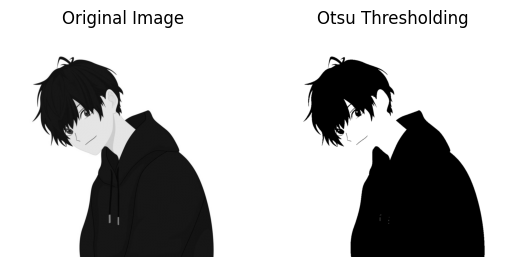

In [12]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image in grayscale
image = cv2.imread('Amit.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to remove noise
blur = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Otsu's thresholding to binarize the image
otsu_threshold,image_result = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(f"Obtained optimal threshold: {otsu_threshold}")

# Display the original image and thresholded images
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(image_result, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')
plt.show()

# Practical No 7
## 7) Convert RGB images to HSV and extract specific colour objects


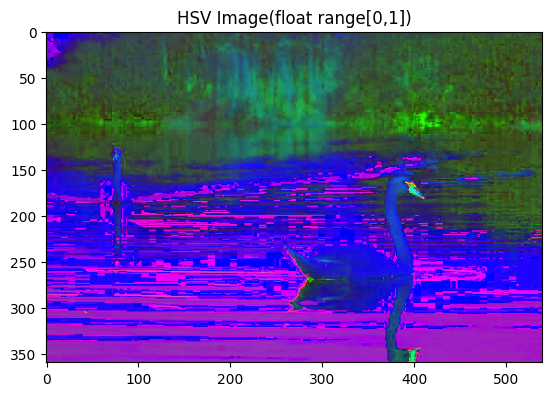

In [13]:
from skimage import color
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Read the image(io.imread reads in RGB format)
# Replace 'bird.jpg' with your image file path
rgb_image = io.imread('swarn.jpg')

# Convert the image to float values in the range[0,1]
img_float = rgb_image.astype(np.float32) / 255.0

# Convert the RGB image to HSV using color.rgb2hsv()
hsv_image = color.rgb2hsv(img_float)

# Display the image using matplotlib(optional)
plt.imshow(hsv_image)
plt.title('HSV Image(float range[0,1])')
plt.show()

# Practical 8
## 8) Implement feature extraction using OpenCV

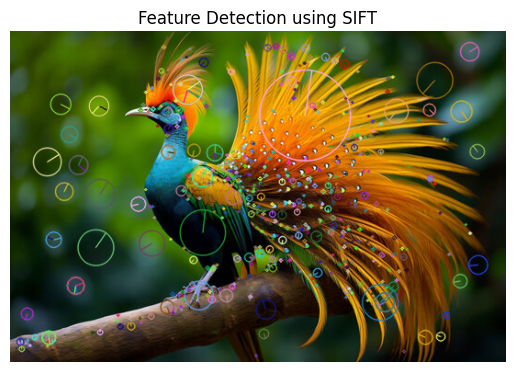

In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Bird.jpg')

# Check if image is loaded
if image is None:
    print("Error loading image")
    exit()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints,descriptors=sift.detectAndCompute(gray_image,None)

# Draw keypoints on the image
output_image =cv2.drawKeypoints(image,keypoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.imshow(cv2.cvtColor(output_image,cv2.COLOR_BGR2RGB))
plt.title('Feature Detection using SIFT')
plt.axis('off')
plt.show()

# Practical No 9
## 9) Develop a complete image processing system

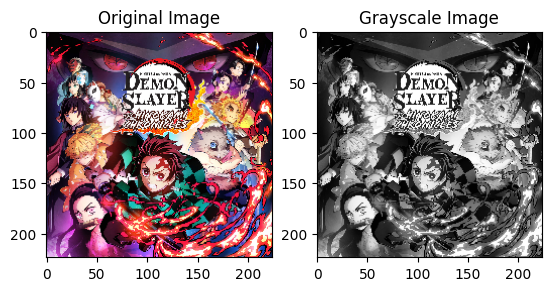

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to load an image and preprocess it
def load_and_preprocess_image(image_path):
  # Load the image
  image = cv2.imread(image_path)
  # Convert to RGB
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  # Resize image to a standard size
  image_resized = cv2.resize(image,(224,224))

  # Convert to grayscale for simplicity
  image_gray = cv2.cvtColor(image_resized,cv2.COLOR_RGB2GRAY)

  return image_resized,image_gray

image_path = 'Demon.jpg'
image_resized,image_gray = load_and_preprocess_image(image_path)

# Display images
plt.subplot(1,2,1)
plt.imshow(image_resized)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(image_gray,cmap='gray')
plt.title('Grayscale Image')
plt.show()

